In [9]:
import matplotlib.pyplot as plt
import illustris_python as il
import numpy as np
import sys
import pandas as pd
import h5py
import ast
import matplotlib.image as mpim
import matplotlib.colors as colors
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns
import glob

In [10]:
df= pd.read_csv("smbh_snap_results99.csv")
df = df.drop(['snap','Unnamed: 0','id',],axis = 1)
selected_columns = df.iloc[:, [0,22,23,24,26,41,42,65,76]]
print(selected_columns.keys())

Index(['bhmdot', 'mass', 'mass_gas', 'mass_dm', 'mass_bhs', 'massinrad_bhs',
       'sfr', 'veldisp', 'mass_log_msun'],
      dtype='object')


/home/draco/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


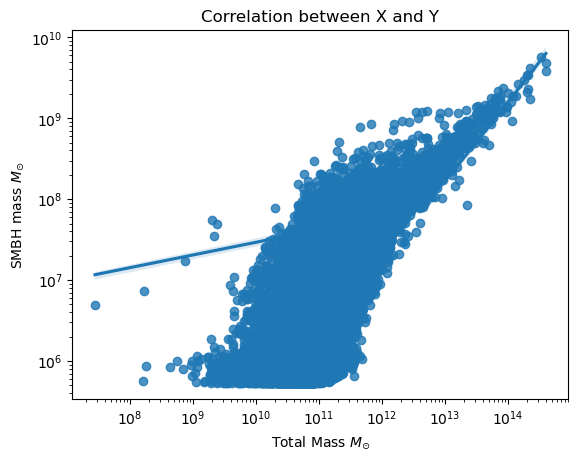

In [16]:
h = 0.6774
mass_bhs = ((df['mass_bhs'])*h*1e10)
mass_galaxy = 10**(df['mass_log_msun']) #### anti-log since it is in mass_log_msun
sfr = np.log(df['sfr'])

sns.regplot(x= mass_galaxy, y= mass_bhs)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Total Mass $M_{\odot}$')
plt.ylabel('SMBH mass $M_{\odot}$')
plt.title('Correlation between X and Y')
plt.show()

In [19]:
df2 = df[df['mass_stars'] == 0]


There are some ids in which the mass of the stars = 0

### SMBH vs Galaxy Mass

Text(0, 0.5, 'SMBH mass $M_{\\odot}$')

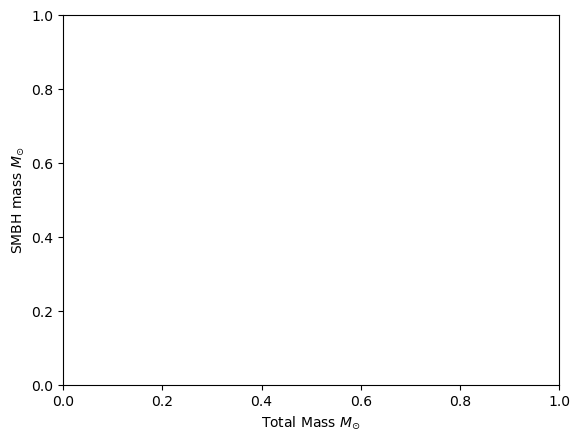

In [20]:
h = 0.6774
mass_bhs = (df['mass_bhs'])*h*1e10
plt.xlabel('Total Mass $M_{\odot}$')
plt.ylabel('SMBH mass $M_{\odot}$')

#### Here I will be plotting a 2-d histogram to check the denisty of 

Text(0, 0.5, 'SMBH mass $M_{\\odot}$')

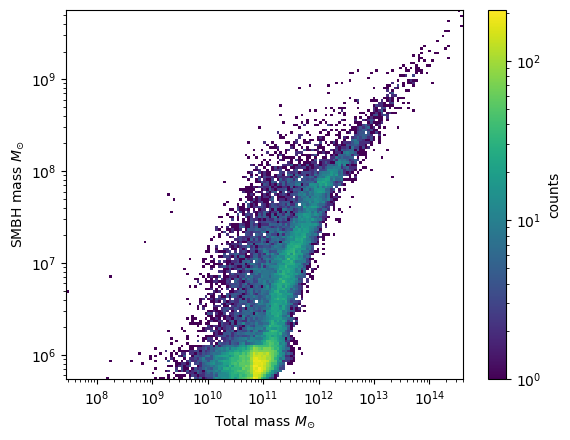

In [21]:
bin1=np.logspace(np.log10(min(mass_bhs)),np.log10(max(mass_bhs)),num = 150)
bin2=np.logspace(np.log10(min(mass_galaxy)),np.log10(max(mass_galaxy)),num =150)
plt.hist2d(mass_galaxy,mass_bhs,bins=(bin2,bin1), norm=colors.LogNorm())
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label="counts")
plt.xlabel('Total mass $M_{\odot}$')
plt.ylabel('SMBH mass $M_{\odot}$')


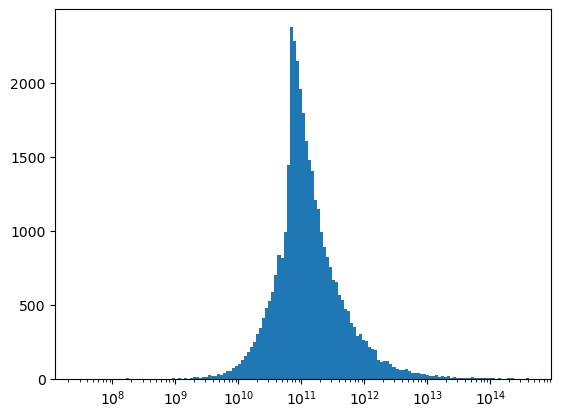

In [22]:
plt.hist(mass_galaxy,bins=bin2)
plt.xscale('log')


## Accretion vs BH Mass and Accretion vs Galaxy Mass

In [23]:
df_bhmdot_0 = df[df['bhmdot']!=0] 


In [24]:
bhmdot = df_bhmdot_0['bhmdot']*10*0.978 ###### in m_solar/yr
Tot_mass = 10**df_bhmdot_0['mass_log_msun']
mass_bhs_1 =(df_bhmdot_0['mass_bhs'])*(h*1e10)
mass_dm =df_bhmdot_0['mass_dm']

### Accretion Vs BH Mass

Text(0, 0.5, 'Accretion Rate $M_{\\odot}/Yr$')

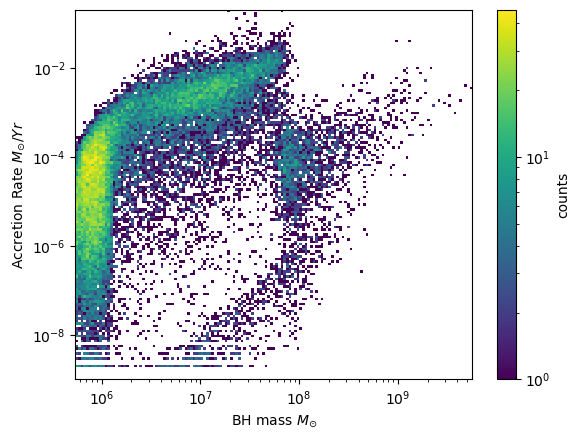

In [25]:
bin1=np.logspace(np.log10(min(bhmdot)),np.log10(max(bhmdot)),num = 150)
bin2=np.logspace(np.log10(min(mass_bhs_1)),np.log10(max(mass_bhs_1)),num =150)
# plt.scatter(bhmdot,mass_bhs_1)
h=plt.hist2d(mass_bhs_1,bhmdot,bins=(bin2,bin1),norm=colors.LogNorm())
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label="counts")
plt.xlabel('BH mass $M_{\odot}$')
plt.ylabel('Accretion Rate $M_{\odot}/Yr$')

Text(0, 0.5, 'Counts')

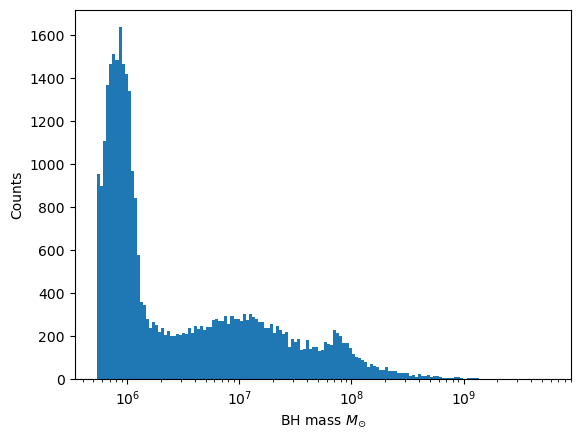

In [26]:
counts1,bins,patches = plt.hist(mass_bhs_1,bins =bin2)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('BH mass $M_{\odot}$')
plt.ylabel('Counts')


#### Accretion vs Galaxy Mass

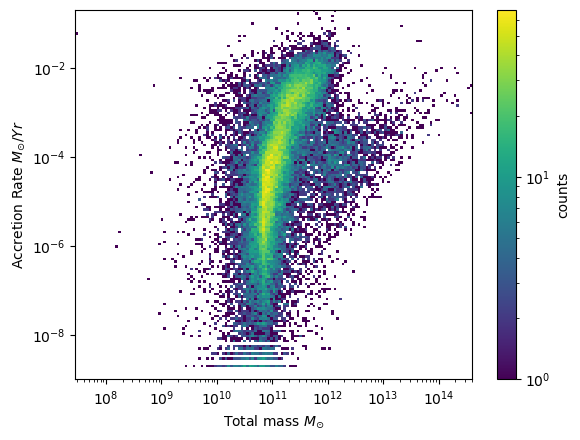

In [28]:
bin1=np.logspace(np.log10(min(bhmdot)),np.log10(max(bhmdot)),num = 150)
bin2=np.logspace(np.log10(min(Tot_mass)),np.log10(max(Tot_mass)),num =150)
h=plt.hist2d(Tot_mass,bhmdot,bins=(bin2,bin1),norm=colors.LogNorm())
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Total mass $M_{\odot}$')
plt.ylabel('Accretion Rate $M_{\odot}/Yr$')
plt.colorbar(label="counts")
# print(h) 

Is this happening as there more data in $10^{11} M_{\odot}$ ?


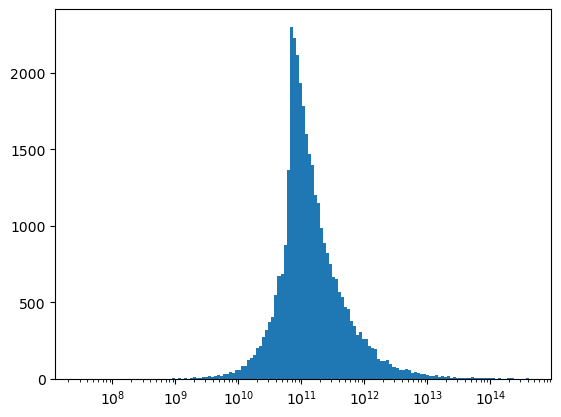

In [29]:
counts2,bins,patches = plt.hist(Tot_mass,bins =bin2)
# print(len(counts2))
plt.xscale('log')


So, here I checked if there are more data available for $10^{11} M_{\odot}$.Looks like that! But, can we remove this effect to see if this is there is a trend in the SMBH accretion rate and the mass of the galaxy without depending on the number of data availaible for each mass?

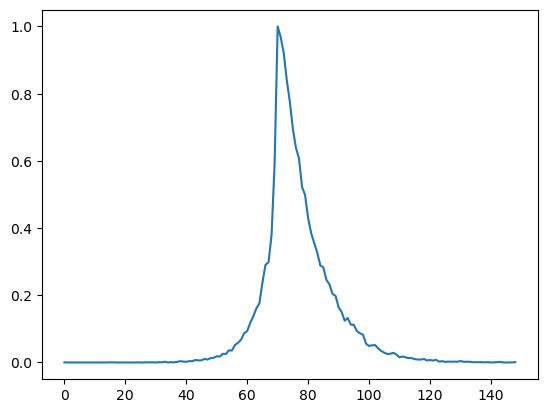

In [30]:
weight = (counts2/max(counts2))
# print("weight of each bins: \n",weight)
plt.plot(counts2/max(counts2))

149


/tmp/ipykernel_32060/4154440702.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  inv = np.reciprocal(weight)


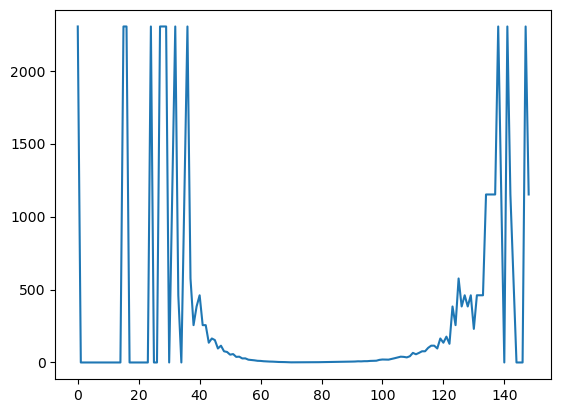

In [31]:
inv = np.reciprocal(weight)
inv[inv == np.inf] = 0
plt.plot(inv)
print(len(inv))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


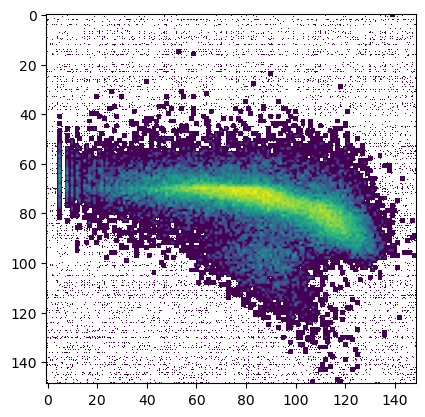

In [32]:
h_0 = np.transpose(h[0])
plt.imshow(h[0],norm=colors.LogNorm())
print((h_0))

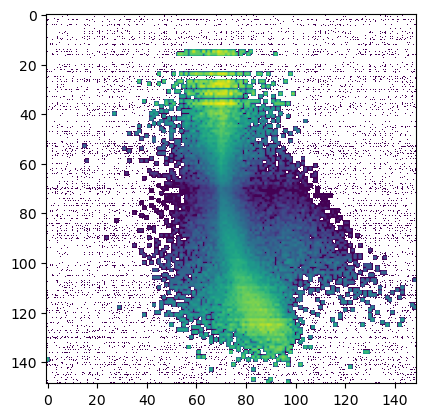

In [33]:
for i in range(len(inv)):
    h_0[:,i]*=inv
plt.imshow(h_0,norm=colors.LogNorm())

Need to think on how to implement this!

### Star Formation Rate vs Galaxy Mass

Text(0, 0.5, 'Star Formation Rate $M_{\\odot}/Yr$')

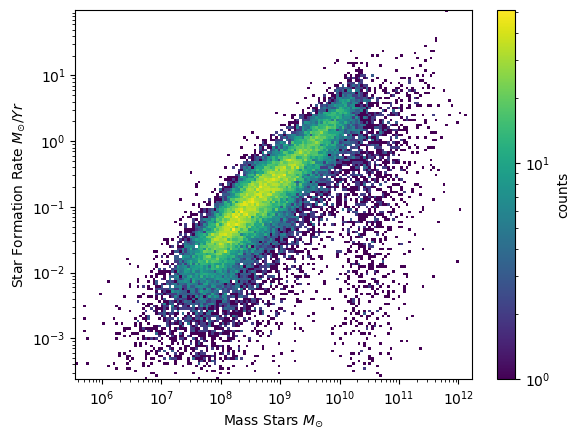

In [34]:
df1 = df[(df['sfr'] != 0) & (df['mass_stars'] != 0)]
sfr =df1['sfr']
mass_star = df1['mass_stars']*(0.6774*1e10)
# print(mass_star[mass_star<1])


bin1=np.logspace(np.log10(min(sfr)),np.log10(max(sfr)),num = 150)
bin2=np.logspace(np.log10(min(mass_star)),np.log10(max(mass_star)),num =150)
plt.hist2d(mass_star,sfr,bins=(bin2,bin1),norm=colors.LogNorm())
# sns.regplot(x= mass_star, y= sfr)
plt.yscale('log')
plt.xscale('log')
plt.colorbar(label="counts")
plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Star Formation Rate $M_{\odot}/Yr$')

670625.9999999999
36898


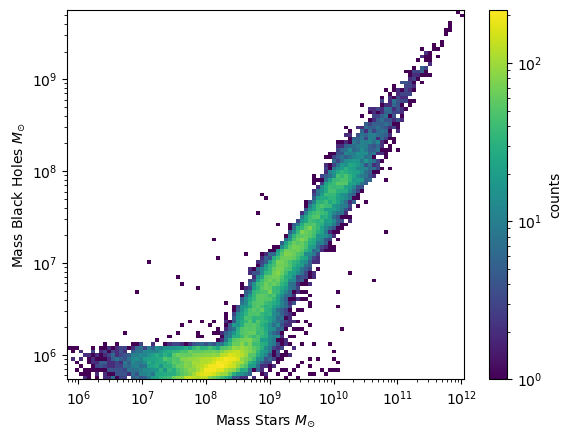

In [37]:
h = 0.6774
df_n = df[(df['mass_bhs'] != 0) & (df['massinrad_stars'] != 0)]
M_bh = df_n['mass_bhs']*h*1e10
M_star = df_n['massinrad_stars']*h*1e10
print(min(M_star))
bin1=np.logspace(np.log10(min(M_bh)),np.log10(max(M_bh)),num = 100)
bin2=np.logspace(np.log10(min(M_star)),np.log10(max(M_star)),num =100)
plt.hist2d(M_star,M_bh,bins=(bin2,bin1),norm=colors.LogNorm())
plt.yscale('log')
plt.xscale('log')
# plt.xlim(10e8)
plt.colorbar(label="counts")
plt.xlabel('Mass Stars $M_{\odot}$')
plt.ylabel('Mass Black Holes $M_{\odot}$')
print(len(df_n))


In [36]:
logMstar  , logMbh = np.log10(M_star) , np.log10(M_bh)
step = 0.5 
Smass_range = np.arange(np.nanmin(logMstar) , np.nanmax(logMstar) , step)
Bmass_range , Bmass_err = np.array([]) , np.array([])

for i,j in enumerate(Smass_range):
    w = ((logMstar<j+step)&(logMstar>j))
    Bmass_range = np.append(Bmass_range , np.nanmedian(logMbh[w]))
    Bmass_err   = np.append(Bmass_err , np.nanstd(logMbh[w]))
    

<ErrorbarContainer object of 3 artists>

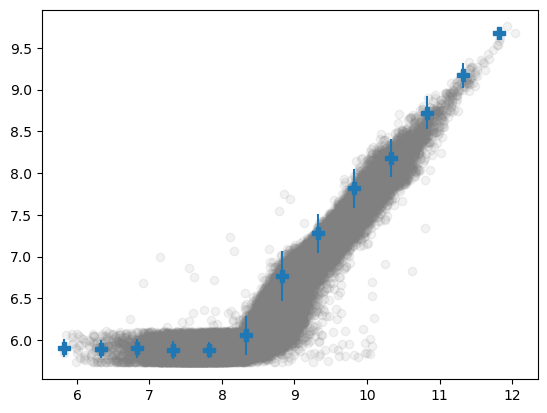

In [77]:
plt.scatter(logMstar , logMbh , alpha = 0.1 , color='grey')
plt.errorbar(Smass_range , Bmass_range , yerr=Bmass_err , fmt='P' , ms=8)
plt.xli